In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv')

df.head()
y = df['Value']

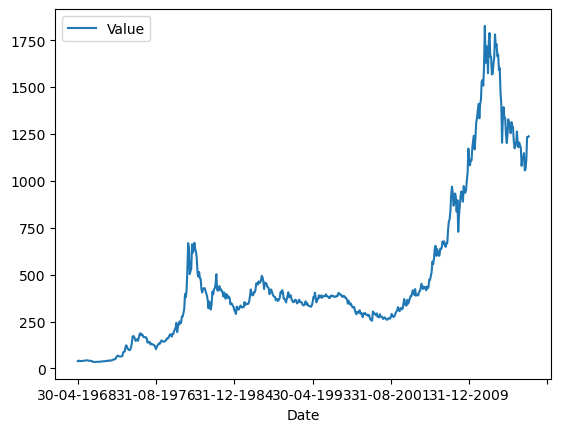

In [7]:
df.plot(x='Date', y='Value')
plt.show()

Centered Moving Average(MA)

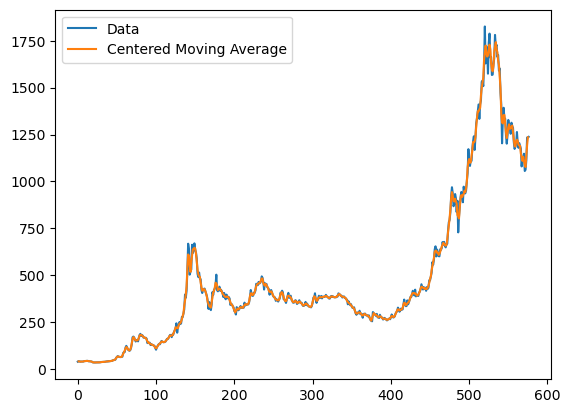

In [8]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label= 'Centered Moving Average')
plt.legend(loc='best')
plt.show()

In [11]:
y_train = df['Value'][:-6]
y_test = df['Value'][-6:]
span = 3

Trailling Moving Average(MA)

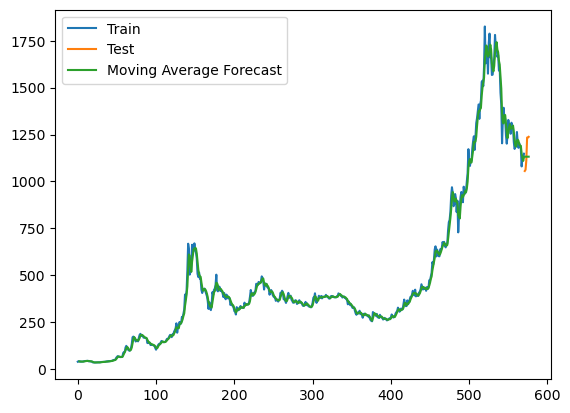

In [12]:
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label= 'Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [13]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error


rms = sqrt(mean_squared_error(y_test, MA_series))
print(rms)

84.66891483235678


Simple Exponential Smoothing

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


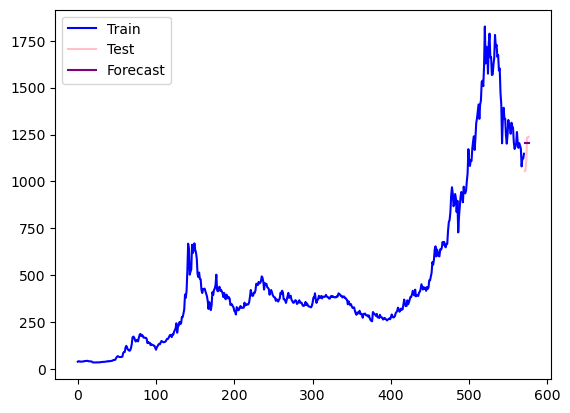

RMSE =  95.3780859170357


In [14]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
plt.legend(loc='best')
plt.show()
print('RMSE = ',sqrt(mse(y_test, fcast1)))


Advanced Exponential Forecast (Smoothing)

Holt's Linear Trend Method

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


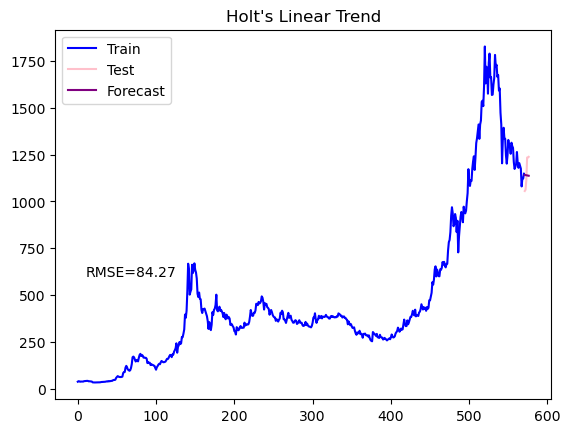

In [15]:
from statsmodels.tsa.api import Holt
alpha = 0.8
beta = 0.02
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Holt's Linear Trend")
plt.legend(loc= 'best')
plt.show()


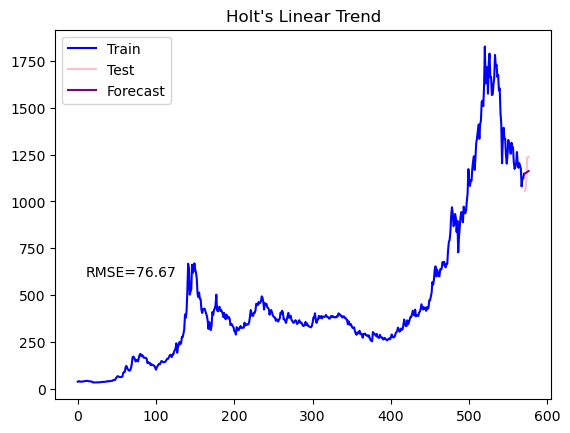

In [16]:

holt = Holt(y_train)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Holt's Linear Trend")
plt.legend(loc= 'best')
plt.show()


Holt's Exponential Trend Method

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


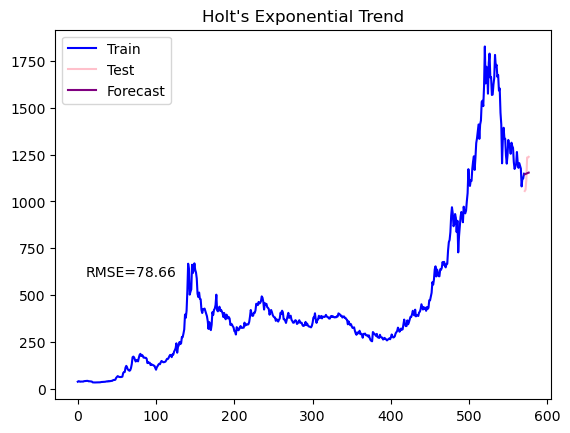

In [17]:
from statsmodels.tsa.api import Holt
alpha = 0.8
beta = 0.02
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Holt's Exponential Trend")
plt.legend(loc= 'best')
plt.show()

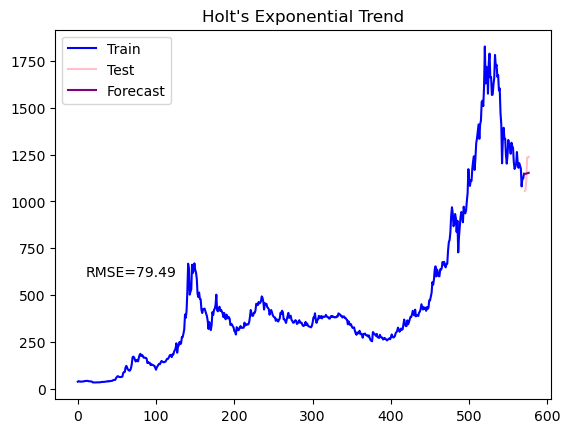

In [18]:
holt = Holt(y_train, exponential=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Holt's Exponential Trend")
plt.legend(loc= 'best')
plt.show()

Additive Damped Trend

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


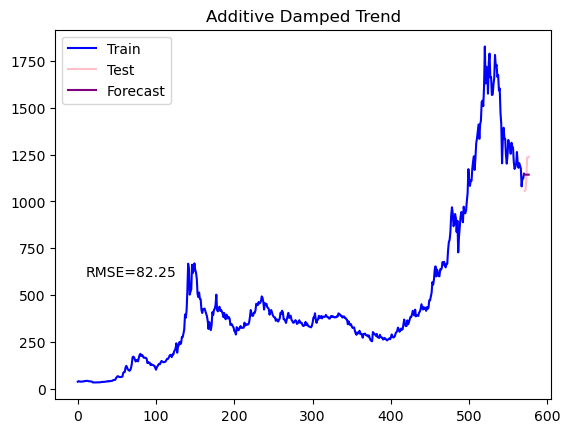

In [19]:
from statsmodels.tsa.api import Holt
alpha = 0.8
beta = 0.02
phi = 0.1
add_damp = Holt(y_train, damped_trend= True)

fit1 = add_damp.fit(smoothing_level=alpha, smoothing_trend = beta, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc= 'best')
plt.show()


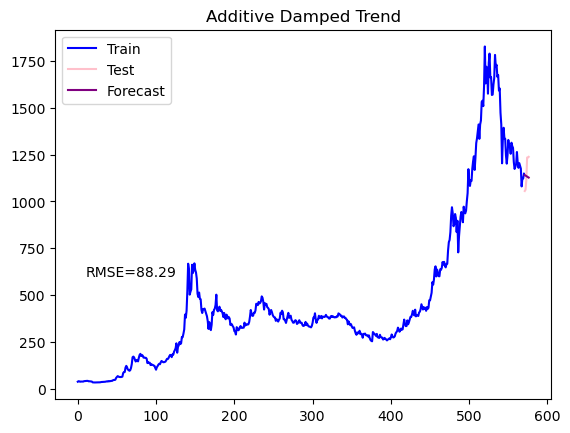

In [20]:
add_damp = Holt(y_train, damped_trend= True)

fit1 = add_damp.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc= 'best')
plt.show()


Multiplicative Damped Trend

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


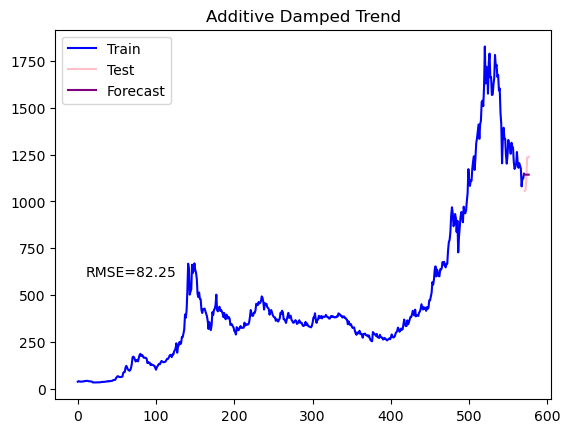

In [21]:
alpha = 0.8
beta = 0.02
phi = 0.1
add_damp = Holt(y_train, damped_trend= True, exponential=True)

fit1 = add_damp.fit(smoothing_level=alpha, smoothing_trend = beta, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc= 'best')
plt.show()

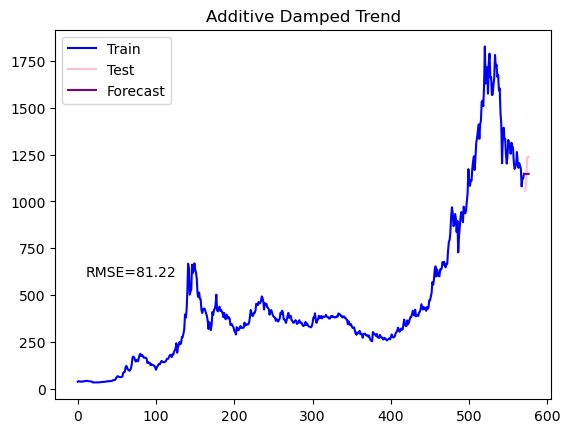

In [30]:
add_damp = Holt(y_train, damped_trend= True, exponential=True)
fit1 = add_damp.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc= 'best')
plt.show()


Holt-Winters Seasonal Method

Additive Method

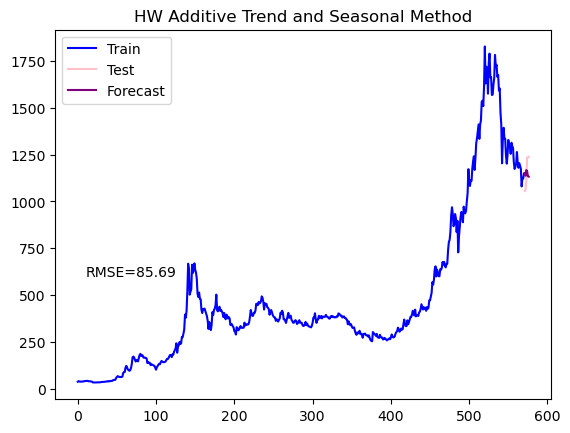

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc= 'best')
plt.show()

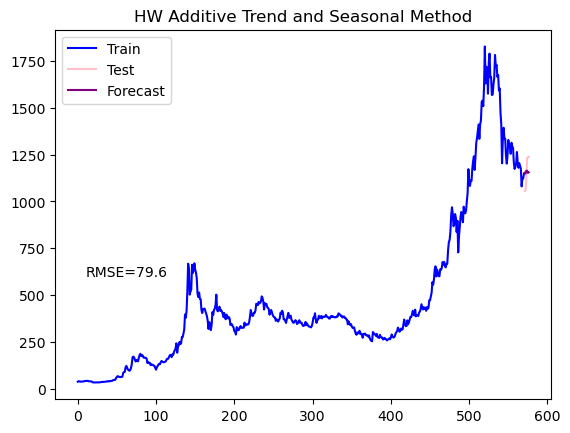

In [24]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc= 'best')
plt.show()

Additive Trend and Multiplicative Seasonal Method

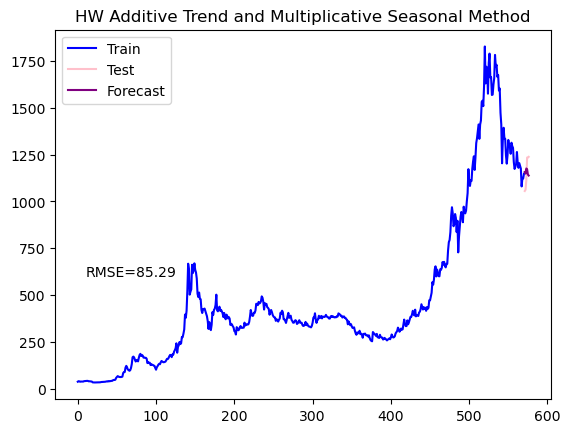

In [25]:
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc= 'best')
plt.show()

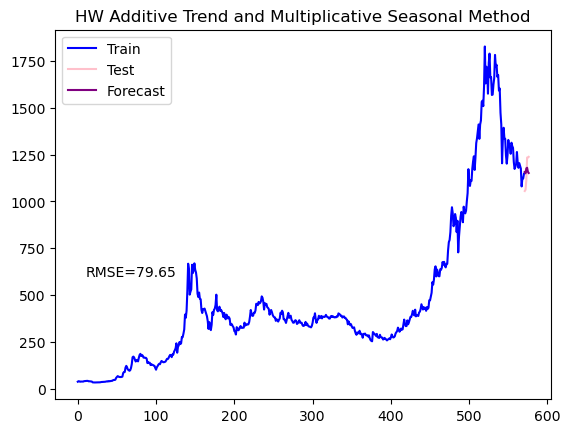

In [26]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc= 'best')
plt.show()

Damped HW Additive Trend and Multiplicative Seasonal Method

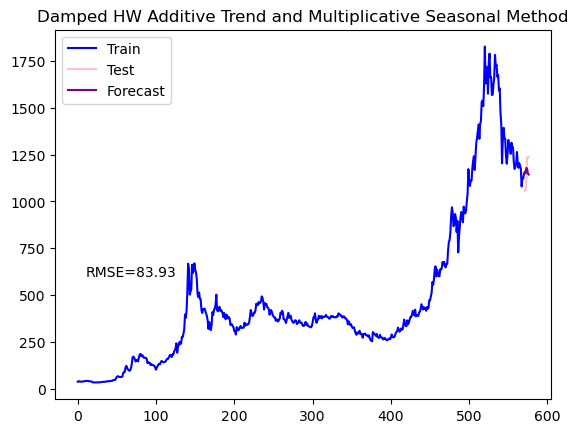

In [27]:
alpha = 0.8
beta = 0.02
gamma = 0.1
phi = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True)
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal=gamma, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Damped HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc= 'best')
plt.show()

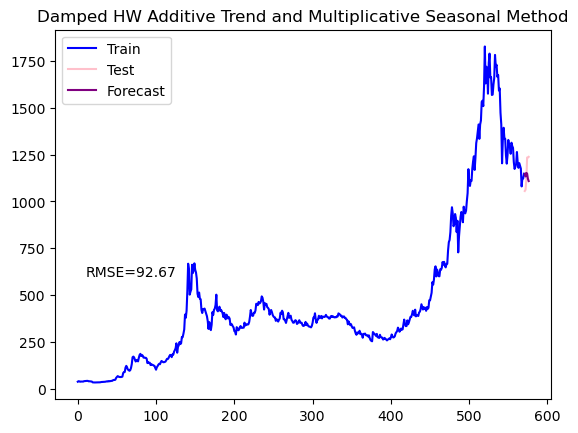

In [34]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True)
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))
#plot
y_train.plot(color='blue', label='Train')
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label = 'Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(10,600, "RMSE="+str(error))
plt.title("Damped HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc= 'best')
plt.show()